In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 12,
          'figure.figsize': (10, 10),
         'axes.labelsize': 12,
         'axes.titlesize': 12,
         'xtick.labelsize':12,
         'ytick.labelsize':12}
plt.rcParams.update(params) 

from sympy.solvers import solve

from sympy import Symbol, Function, nsolve 

Suponga que el rango de sintonía en frecuencia deseado es de $80 MHz$ a $120 MHz$ y  se desea $Q_r= 14$. 
Bajo este supuesto, eligiendo $L_s = 280 nH$ usando


$$L_s = L_1 + L_2 + L_3 = \frac{R_i}{\omega_c} \sqrt{\frac{R_s}{R_i}-1}+  \frac{1}{(\frac{1}{Q_r} - \frac{1}{Q_o})} \frac{R_i}{2\omega_c} +\frac{R_i}{\omega_c} \sqrt{\frac{R_l}{R_i}-1} $$





In [15]:
def calcRi(wo,Ls,rs,rl,Qr,Qo= 1000):
    ri  = Symbol('ri')

    fri = ri/wo*(rs/ri-1)**(1/2) + ri/2/wo/(1/Qr-1/Qo) + ri/wo * (rl/ri-1)**(1/2) - Ls  
    ris = solve( fri  , ri)
    r   = [r  for r in ris if r>0 ][0] 
    return r

def calcC(ri, wo,Ls,rs,rl,Qr):
    Qm1 = (rs/ri-1)**(1/2)
    C1  = Qm1/wo/rs

    Qm3 = (rl/ri-1)**(1/2)
    C3  = Qm3/wo/rl

    C1s = C1*(1+1/Qm1**2)
    C3s = C3*(1+1/Qm3**2)
    
    Cs  = 1/(Ls*wo**2)
    C2  = 1/(1/Cs - 1/C1s -1/C3s) 
    return C1,C2,C3


def Av(w,rs,C1,C2,C3,Ls,rl,Qo):
    yl = (1/rl)+(w*C3)*1j
    zl = 1/yl
    z1 = ((w*Ls)/Qo)+(w*Ls*1j)+1/(w*C2*1j)+zl
    yi = 1/z1+(w*C1*1j)
    zi = 1/yi    
    return (abs((zi/(rs+zi))*(zl/z1)))


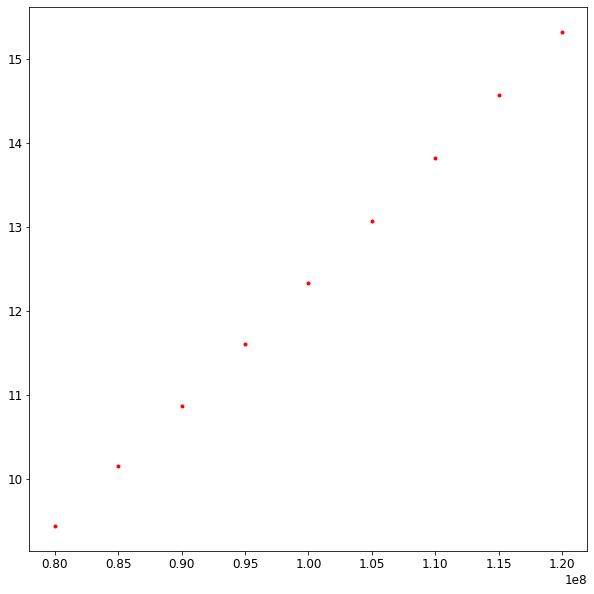

80000000.0 9.43569950523551 8.24983162908663e-11 1.95781368393839e-11
85000000.0 10.1507239972107 7.41981213991900e-11 1.71285067549810e-11
90000000.0 10.8722271068610 6.70951185476283e-11 1.51033895221160e-11
95000000.0 11.5998964354846 6.09629064220584e-11 1.34108940398503e-11
100000000.0 12.3334651101208 5.56269703369339e-11 1.19825800414980e-11
105000000.0 13.0727048158842 5.09508988280341e-11 1.07666524551198e-11
110000000.0 13.8174203134196 4.68267181638035e-11 9.72334721603789e-12
115000000.0 14.5674450924608 4.31679899056932e-11 8.82173927417581e-12
120000000.0 15.3226379088201 3.99047999973386e-11 8.03749403064471e-12


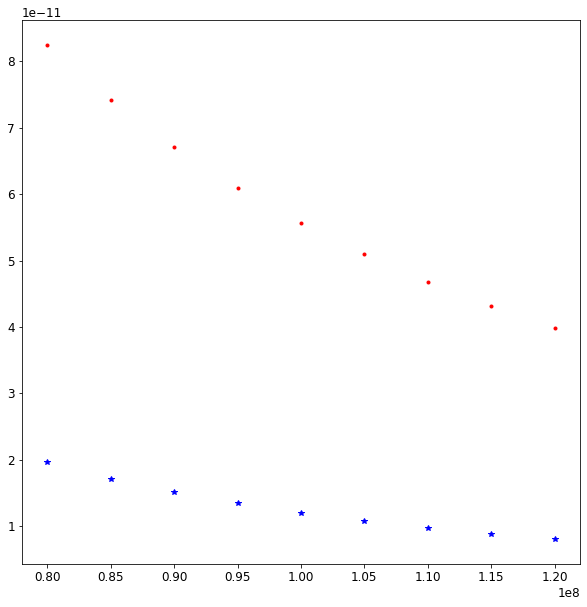

In [21]:
fo = 100e6 
wo = 2*np.pi*fo
Ls = 280e-9
rs = 50
rl = 50
Qr = 14
Qo= 40    
    


freq = np.arange(80e6,125e6,5e6)


for f in freq:
    r = calcRi(2*np.pi*f,Ls,rs,rl,Qr,Qo)
    plt.plot(f,r,'r.')
plt.show()

for f in freq:
    r = calcRi(2*np.pi*f,Ls,rs,rl,Qr,Qo)  
    C1,C2,C3  = calcC(r,2*np.pi*f,Ls,rs,rl,Qr)
    print(f, r, C1, C2)
    
    plt.plot(f,C1,'r.')
    plt.plot(f,C2,'b*')
plt.show()    

1.349301678118447e-10 1.751048503466622e-11
1.269930991170303e-10 1.5296165299322886e-11
1.1993792694386194e-10 1.3477855091964576e-11
1.1362540447313237e-10 1.1966245676113088e-11
1.0794413424947577e-10 1.0695906153414383e-11
1.028039373804531e-10 9.61799923302671e-12
9.813103113588704e-11 8.695467757388688e-12
9.386446456476154e-11 7.899777246102628e-12
8.995344520789646e-11 7.2086642949872166e-12


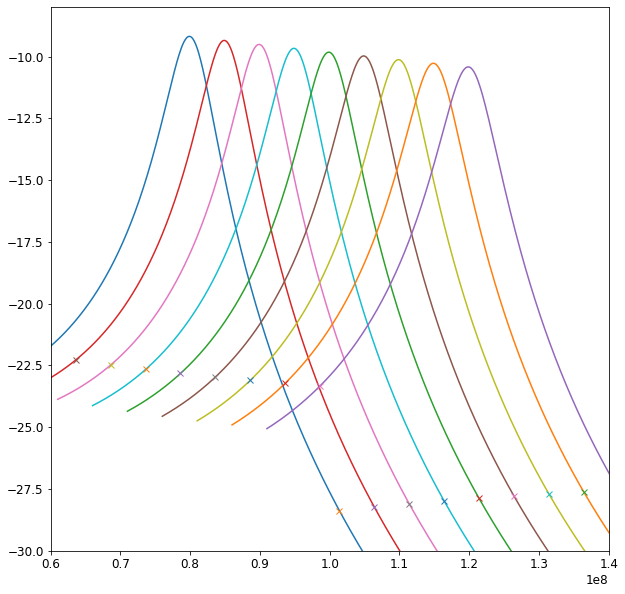

In [22]:
df = np.arange(-29e6,80e6,0.1e6)

rif = 4  

for f in freq:

    C1,C2,C3  = calcC(rif,2*np.pi*f,Ls,rs,rl,Qr)
    print(C1,C2)
    plt.plot(f+df,20*np.log10([Av((fi+f)*2*np.pi,rs,C1,C2,C3,Ls,rl,Qo) for fi in df]))
    plt.plot(f+2*10.7e6,20*np.log10(Av((2*10.7e6+f)*2*np.pi,rs,C1,C2,C3,Ls,rl,Qo)),'x')
    plt.plot(f-2*10.7e6,20*np.log10(Av((-2*10.7e6+f)*2*np.pi,rs,C1,C2,C3,Ls,rl,Qo)),'x')
    
plt.xlim([60e6,140e6])
plt.ylim([-30,-8])
plt.show()    

In [23]:
print('.param rs =  {:2.1f} '.format(rs) )
print('.param rl =  {:2.1f} '.format(rl) )

print('.param Ls  =  {:3.2f}n'.format(Ls/1e-9) )

print('.param C1 =  {:3.3f}p'.format(C1/1e-12) )
print('.param C2 =  {:3.3f}p'.format(C2/1e-12) )
print('.param C3 =  {:3.3f}p'.format(C3/1e-12) )

.param rs =  50.0 
.param rl =  50.0 
.param Ls  =  280.00n
.param C1 =  89.953p
.param C2 =  7.209p
.param C3 =  89.953p
